In [30]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-fitting-tempfit)

Here are the 5-year temperature averages again.

In [31]:
year = arange(1955, 2005, 5)
y = array([-0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
    0.1180, 0.2100, 0.3320, 0.3340, 0.4560])
t = (year - 1950) / 10

The standard best-fit line results from using a linear polynomial that meets the least-squares criterion.
```{tip}
:class: dropdown
Backslash solves overdetermined linear systems in a least-squares sense.
```

In [32]:
V = array([ [t[i], 1] for i in range(t.size) ])    # Vandermonde-ish matrix
print(V.shape)

(10, 2)


```{index} ! Python; lstsq
```

In [33]:
from numpy.linalg import lstsq
c, res, rank, sv = lstsq(V, y)
p = poly1d(c)
f = lambda year: p((year - 1950) / 10)

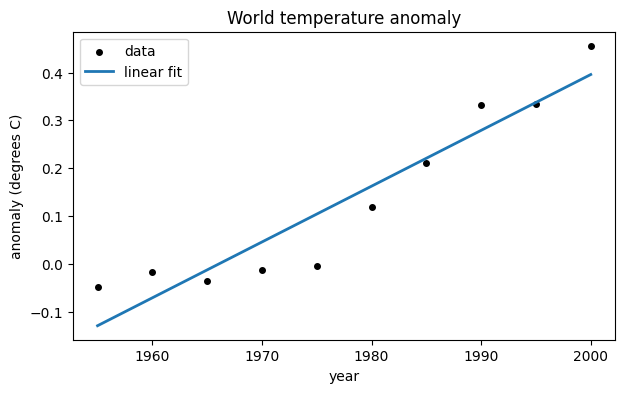

In [34]:
fig, ax = subplots()
ax.scatter(year, y, color="k", label="data")
yr = linspace(1955, 2000, 500)
ax.plot(yr, f(yr), label="linear fit")

xlabel("year")
ylabel("anomaly (degrees C)")
title("World temperature anomaly");
ax.legend();


If we use a global cubic polynomial, the points are fit more closely.

In [35]:
V = array([ [t[i]**3,t[i]**2,t[i],1] for i in range(t.size) ])    # Vandermonde-ish matrix
print(V.shape)

(10, 4)


Now we solve the new least-squares problem to redefine the fitting polynomial.

```{tip}
:class: dropdown
The definition of `f` above is in terms of `p`. When `p` is changed, `f` is updated with it.
```

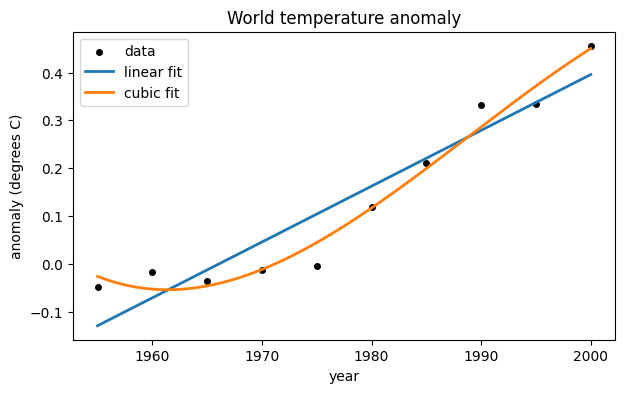

In [36]:
c, res, rank, sv = lstsq(V, y, rcond=None)
p = poly1d(c)
ax.plot(yr, f(yr), label="cubic fit")
ax.legend();
fig

If we were to continue increasing the degree of the polynomial, the residual at the data points would get smaller, but overfitting would increase.